# Garments Project (by: The Guo Family)

Garmets are worn every day by humans around the world. From the famous and highly sought after fashion houses such as the Haus of Gucci, Louis Vitton, Dior, down to the smaller fashion labels, humans have the tendency to buy what is on the shelf. But, behind all the garments that are sold on a day to day basis, what goes behind the scenes? In this project, we want to look at the reasoning between the overtime that happens in this current fashion house together with making three (3) models to predict the number of overtime that will happen in the future.

In [19]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
import os

In [20]:
df = pd.read_csv('garments.csv') # Importing garments.csv file to a pandas dataframe

After importing the dataset into the dataframe, we now look for errors and see what can we do for null cells.

In [21]:
# Dataset structure
print(df.info())  # Column names, data types, and non-null counts
print(df.describe())  # Statistics for numeric columns
print(df.head())  # Preview the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

We see that there are null values in the WIP column, highlighted in the figure below:

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


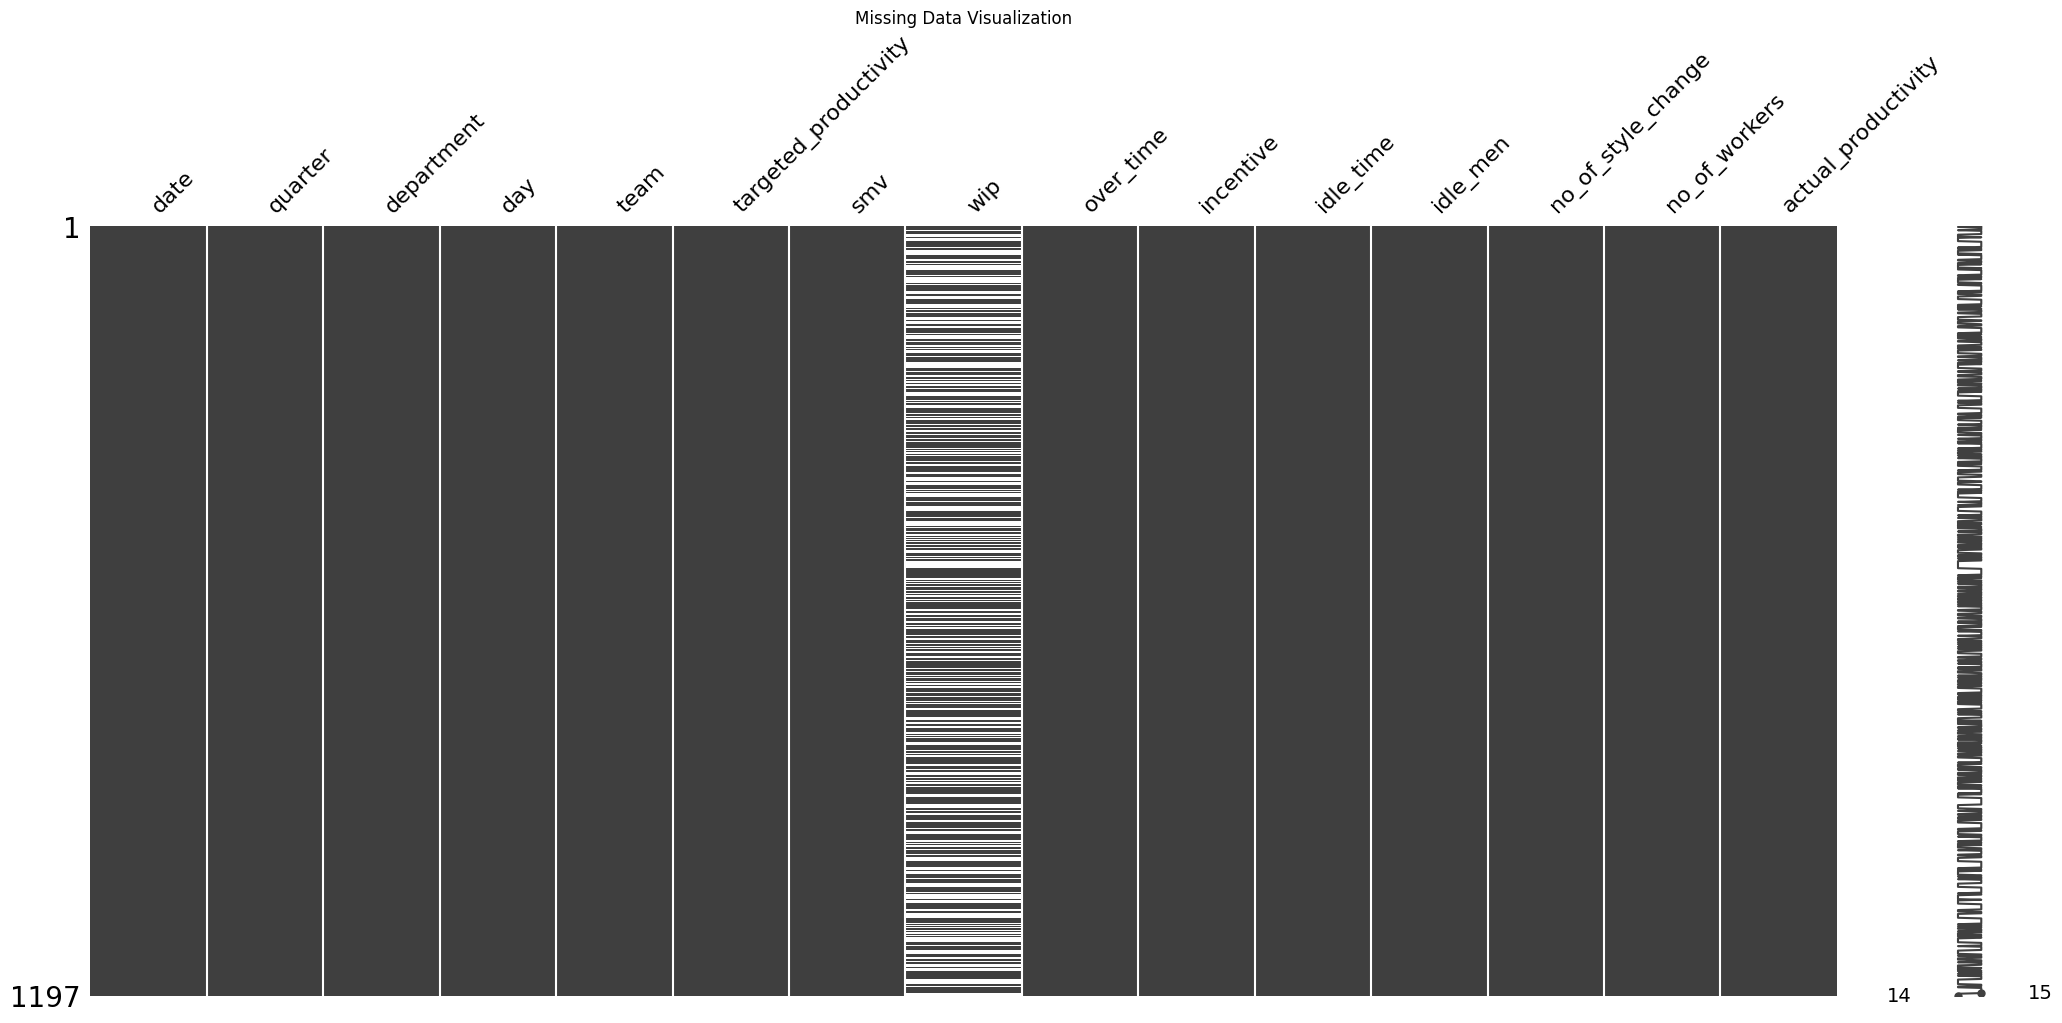

In [22]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

The team chose to replace empty cells with zero. This is doable since WIP stands for "work in progress" if the cell is null, it means that there are no projects that are "work in progress", making them null.

In [23]:
# Replace NaN values with 0
df = df.fillna(0)

# Replace empty strings with 0
df = df.replace('', 0)

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


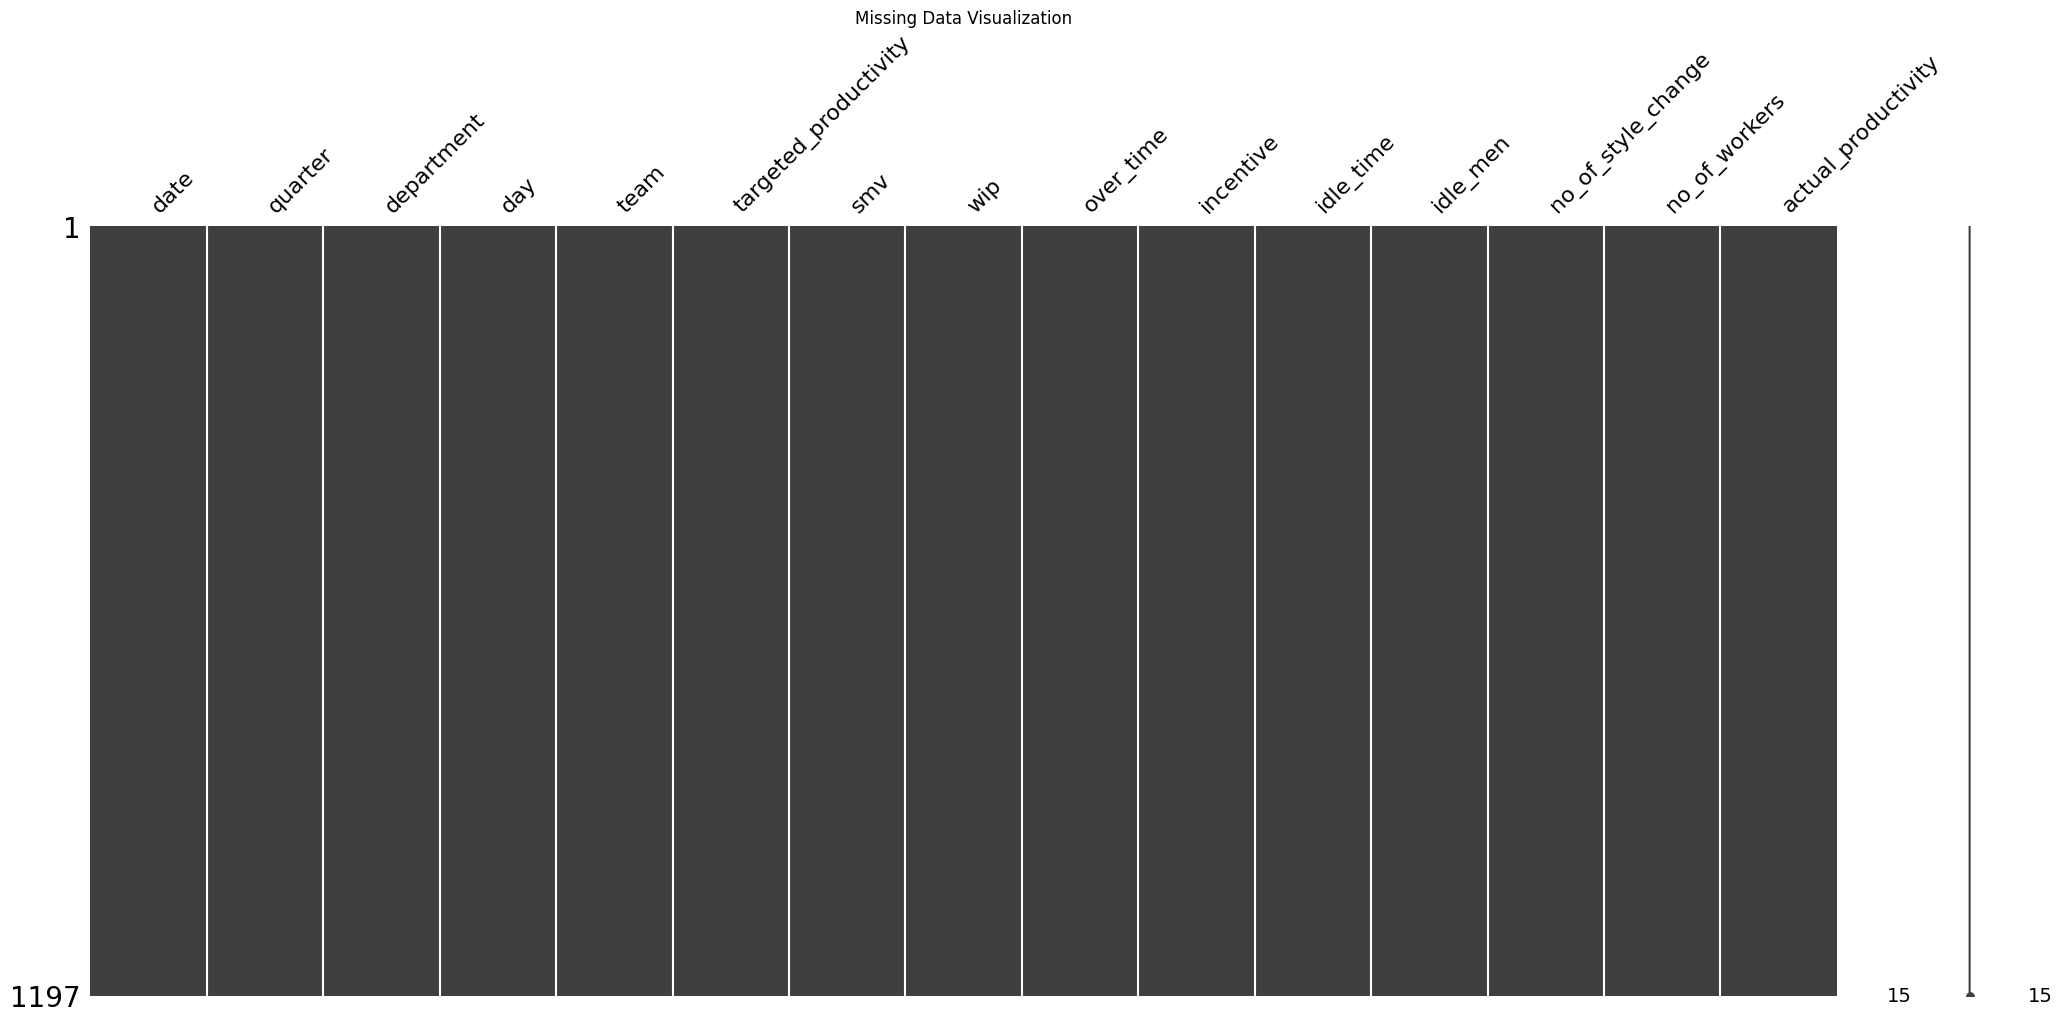

In [24]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

Here we're making sure that the dataset does not have any more null cells.

Afterwards, we make sure that all columns are consistent with their labels or whether or not their values are really integers or numerical.

In [25]:
# Summary statistics for numerical columns
numerical_summary = df.describe()
print(numerical_summary)

              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000   1197.000000   
mean      6.426901               0.729632    15.062172    687.228070   
std       3.463963               0.097891    10.943219   1514.582341   
min       1.000000               0.070000     2.900000      0.000000   
25%       3.000000               0.700000     3.940000      0.000000   
50%       6.000000               0.750000    15.260000    586.000000   
75%       9.000000               0.800000    24.260000   1083.000000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.00

Oddly enough, the "team" column is labeled as "numerical" instead of "categorical". To change this, the team decided to change the column from "numerical" to "categorical".

In [27]:
df['team'] = df['team'].astype('category')

# Check the data type of the 'team' column
print(df['team'].dtype)  # Output should be 'category'

# Get unique categories
print(df['team'].cat.categories)

category
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')


In [28]:
# Summary statistics for numerical columns
numerical_summary = df.describe()
print(numerical_summary)

       targeted_productivity          smv           wip     over_time  \
count            1197.000000  1197.000000   1197.000000   1197.000000   
mean                0.729632    15.062172    687.228070   4567.460317   
std                 0.097891    10.943219   1514.582341   3348.823563   
min                 0.070000     2.900000      0.000000      0.000000   
25%                 0.700000     3.940000      0.000000   1440.000000   
50%                 0.750000    15.260000    586.000000   3960.000000   
75%                 0.800000    24.260000   1083.000000   6960.000000   
max                 0.800000    54.560000  23122.000000  25920.000000   

         incentive    idle_time     idle_men  no_of_style_change  \
count  1197.000000  1197.000000  1197.000000         1197.000000   
mean     38.210526     0.730159     0.369256            0.150376   
std     160.182643    12.709757     3.268987            0.427848   
min       0.000000     0.000000     0.000000            0.000000   
25

In [ ]:
true_numeric_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                        'no_of_style_change', 'no_of_workers']
numeric_columns = df[true_numeric_columns]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numeric columns and update the DataFrame
df[numeric_columns.columns] = scaler.fit_transform(numeric_columns)

After normalizing the values, we move on to adding some columns to help with parsing through data.

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month  # Extract the month

Finally, we move on to looking at the data itself and see what does it mean to this certain fashion haus.

# Exploring the data

Firstly, we look at the distribution of each numerical data and see what it means to the data itself.

In [ ]:
true_numeric_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                        'no_of_style_change', 'no_of_workers', 'actual_productivity', 'targeted_productivity']

# Ensure output directory exists
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

# Starting figure number
figure_number = 2.1

# Starting figure number
major_figure_number = 2  # Represents the major part (e.g., 2.x)
minor_figure_number = 1  # Represents the minor part (e.g., x.1)

# Visualize distributions of numeric columns
for col in true_numeric_columns:
    figure_number = f"{major_figure_number}.{minor_figure_number}" # Combine major and minor figure numbers for the filename
    plt.figure(figsize=(14, 4))  # Adjust figure size
    sns.boxplot(x='month', y=col, data=df, showfliers=True)  # Boxplot
    sns.stripplot(x='month', y=col, data=df, color='black', alpha=0.5, jitter=0.1, dodge=False)  # Reduced jitter
    plt.title(f'Distribution of {col} by Month', fontsize=16, fontweight='bold')  # Title
    plt.xlabel('Month', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
    plt.figtext(0.5, -0.1, f"Figure {figure_number}: Distribution of {col} by Month", ha='center', fontsize=12) # Add figure label as a caption
    
    
    figure_filename = os.path.join(output_dir, f"Figure_{figure_number}.png")
    plt.savefig(figure_filename, bbox_inches='tight')
    
    # Increment the minor figure number
    minor_figure_number += 1
    
    plt.show()


As shown in Figure 2.1, it shows the distribution of over time per month. The chart shows different patterns in overtime hours over three months. In Month 1, the median overtime is higher and more varied than in Months 2 and 3. This might mean there's a seasonal pattern, like a busy time with more work or production, possibly due to certain needs or deadlines. Also, some extreme values in Month 1, almost reaching the highest possible overtime of 1.0, could be due to unusual events, like sudden staff shortages or urgent project needs, causing some workers or days to have much higher overtime.

In [ ]:
# Create a list of columns excluding the true numeric ones
remaining_columns = [col for col in df.columns if col not in true_numeric_columns and col != 'date']

# Filter the remaining categorical columns (assuming they're not numeric)
categorical_columns = df[remaining_columns]

# Check unique values and distributions for the remaining categorical features
for col in categorical_columns:
    plt.figure(figsize=(14, 4))  # Width: 14 inches, Height: 8 inches
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Correlation matrix
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Correlations with 'over_time'
correlation_with_overtime = numeric_columns.corr()['over_time'].sort_values(ascending=False)
print("Correlation with Overtime:\n", correlation_with_overtime)


In [ ]:
# Scatterplots for numeric columns
for col in ['no_of_workers', 'smv', 'wip', 'incentive']:
    sns.scatterplot(x=col, y='over_time', data=df)
    plt.title(f'Overtime vs {col}')
    plt.show()


In [ ]:
# Boxplots for categorical features
for col in ['quarter', 'department', 'day']:
    sns.boxplot(x=col, y='over_time', data=df)
    plt.title(f'Overtime by {col}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Interaction terms (e.g., workers_per_smv)
df['workers_per_smv'] = df['no_of_workers'] / (df['smv'] + 1e-6)
sns.scatterplot(x='workers_per_smv', y='over_time', data=df)
plt.title('Overtime vs Workers per SMV')
plt.show()

# Group-Wise Analysis
grouped = df.groupby('quarter').agg({
    'over_time': ['mean', 'std'],
    'targeted_productivity': ['mean'],
    'actual_productivity': ['mean']
})
print(grouped)


In [ ]:
# Normalize the 'workers_per_smv' column
df['workers_per_smv'] = scaler.fit_transform(df[['workers_per_smv']])

# Define the columns to include in the boxplot
selected_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men', 
                    'no_of_style_change', 'no_of_workers', 'workers_per_smv']

# Boxplot for selected numeric features
plt.figure(figsize=(14, 8))  # Width: 14 inches, Height: 8 inches
sns.boxplot(data=df[selected_columns])  # Use only the selected columns
plt.title('Box Plot for Selected Numeric Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Z-score method for outlier detection
df['z_score'] = zscore(df['over_time'])
outliers = df[df['z_score'].abs() > 3]
print("Outliers:\n", outliers)


In [ ]:
# Trends over time
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df['over_time'].resample('M').mean().plot()
plt.title('Monthly Overtime Trends')
plt.ylabel('Overtime (Mean)')
plt.show()
